# Exploratory Data Analysis of Metro Interstate Traffic Volume

This notebook explores the Metro Interstate Traffic Volume dataset, which includes hourly traffic volume data along with weather and holiday information from 2012 to 2018 on Interstate 94 Westbound in Minneapolis-St Paul, MN. The goal is to perform exploratory data analysis to understand traffic patterns and their relationship with environmental conditions and holidays.


**Data Source:** https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume

![alt text](data/metadata_desc.JPG)

## Setup and Data Loading

### Import libraries and loading the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/modified_Metro_traffic_data.csv')
data.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545.00000
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516.00000
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,9359.07625
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026.00000
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918.00000


## Initial Data Exploration

### Examining the data structure, types of data, unique values, and basic statistics.

In [3]:
# General overview of the data structure
print("Data Shape:", data.shape)  # Showing the number of rows and columns/features
print("\nData Info:")
data.info()

Data Shape: (48214, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48214 entries, 0 to 48213
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 45822 non-null  float64
 2   rain_1h              45803 non-null  float64
 3   snow_1h              48214 non-null  float64
 4   clouds_all           48214 non-null  int64  
 5   weather_main         48214 non-null  object 
 6   weather_description  48214 non-null  object 
 7   date_time            48214 non-null  object 
 8   traffic_volume       45836 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.3+ MB


In [4]:
# Overview of numerical features
print("\nStatistics for Numerical Features:")
print(data.describe())


Statistics for Numerical Features:
               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  45822.000000  45803.000000  48214.000000  48214.000000    45836.000000
mean     281.153884      0.343497      0.000222     49.356287     3258.316171
std       13.971956     45.947092      0.008167     39.015707     2071.433540
min        0.000000      0.000000      0.000000      0.000000    -2954.584230
25%      272.070000      0.000000      0.000000      1.000000     1169.000000
50%      282.420000      0.000000      0.000000     64.000000     3378.000000
75%      291.870000      0.000000      0.000000     90.000000     4944.000000
max      323.063284   9831.300000      0.510000    100.000000     9471.979194


In [5]:
# Overview of categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Features:")
for col in categorical_cols:
    print(f"--- {col} ---")
    print(data[col].value_counts())
    print("\n")


Categorical Features:
--- holiday ---
holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64


--- weather_main ---
weather_main
Clouds           15022
Clear            13249
Mist              5891
Rain              5613
Snow              2845
Drizzle           1805
Haze              1352
Thunderstorm      1024
Fog                907
Smoke               22
Smoke               20
Drizzle!            17
Fog                 17
Squall#             16
Fog#                15
Fog!                15
Hazex               15
Clouds#             14
Haze!               14
Snowx               14
Thunderstormx       14
Haze#               13
Squall!             13
Thunderstorm#       1

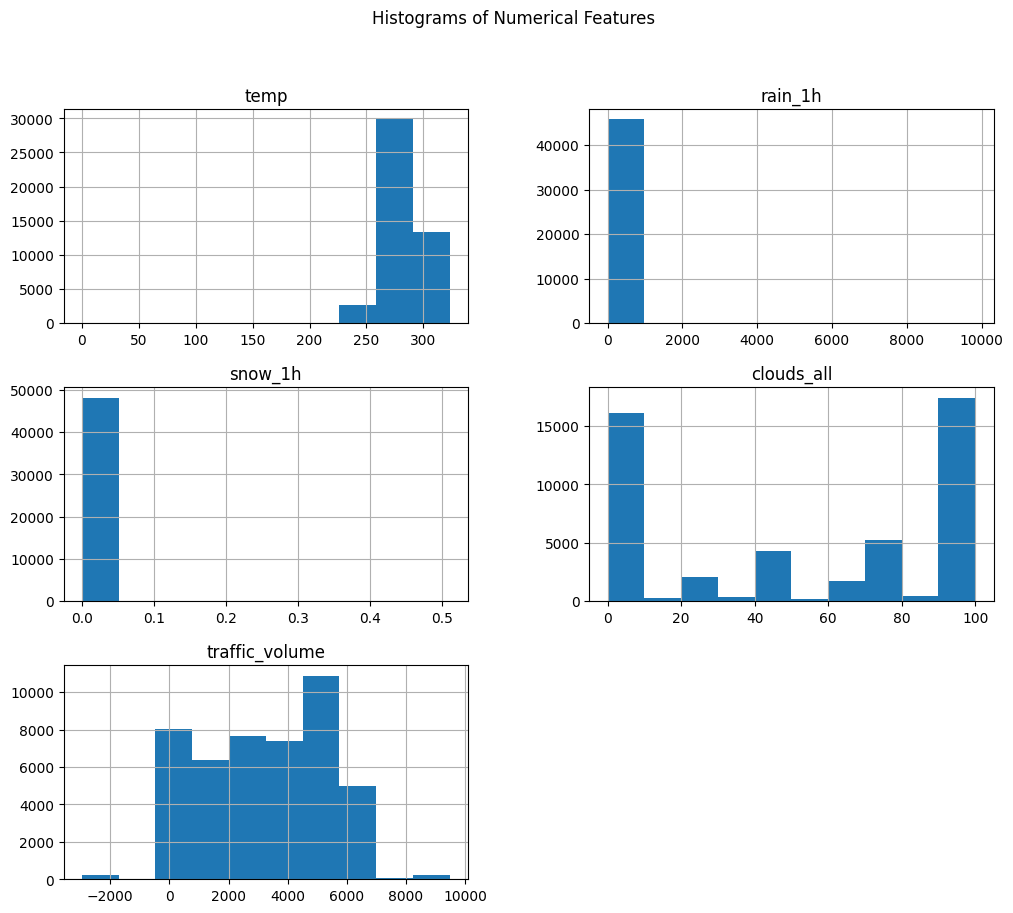

In [6]:
# Visual overview using histograms for numerical data
data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

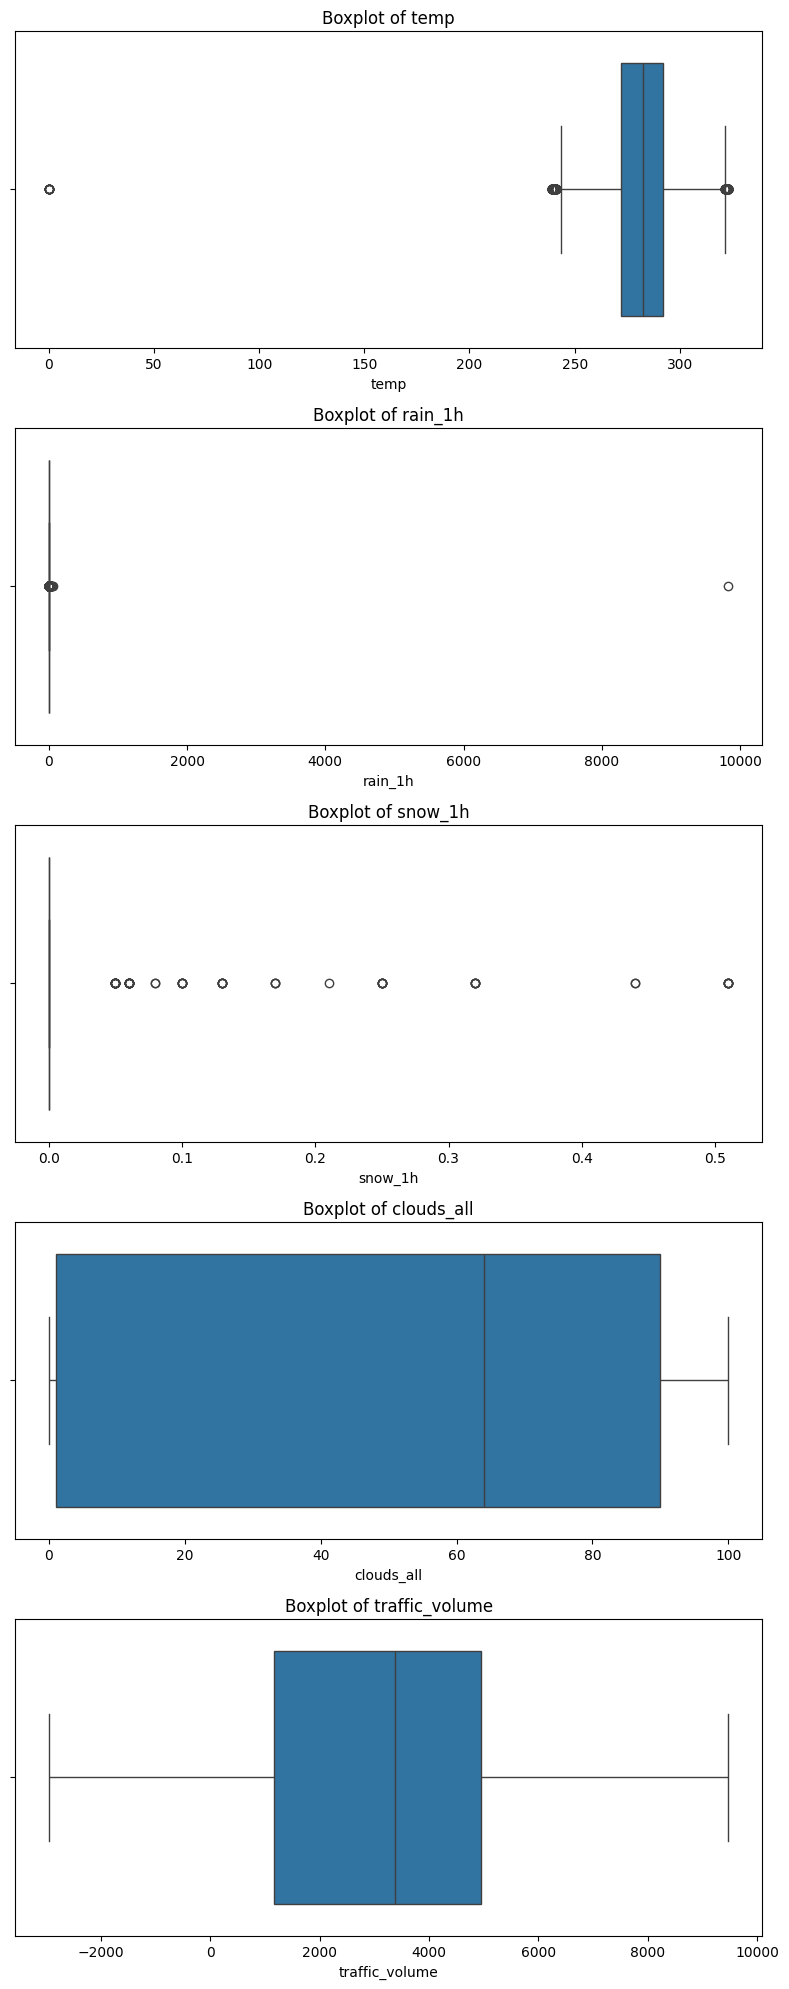

In [7]:
# Boxplots for each numerical feature to spot outliers
fig, axs = plt.subplots(nrows=len(data.select_dtypes(include=['number']).columns), figsize=(8, 20))
for i, col in enumerate(data.select_dtypes(include=['number']).columns):
    sns.boxplot(x=data[col], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Data Cleaning

### Handle missing values, remove duplicates, and correct data types if necessary.

In [8]:
# Check for missing values
print(data.isnull().sum())

holiday                48153
temp                    2392
rain_1h                 2411
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume          2378
dtype: int64


In [9]:
# Fill missing 'holiday' with 'None'
data['holiday'].fillna('None', inplace=True)

C:\Users\poskouie\AppData\Local\Temp\ipykernel_12784\63240478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['holiday'].fillna('None', inplace=True)


In [10]:
# Check for missing values
print(data.isnull().sum())

holiday                   0
temp                   2392
rain_1h                2411
snow_1h                   0
clouds_all                0
weather_main              0
weather_description       0
date_time                 0
traffic_volume         2378
dtype: int64


In [11]:
print("Data Shape-Original:", data.shape)  

# Remove duplicates
data.drop_duplicates(inplace=True)

print("Data Shape-After removing dupliocates:", data.shape)  

Data Shape: (48214, 9)
Data Shape: (48192, 9)


In [12]:
# Correct data types
data['date_time'] = pd.to_datetime(data['date_time'])

In [13]:
data.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545.00000
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516.00000
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,9359.07625
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026.00000
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918.00000
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181.00000
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584.00000
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015.00000
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791.00000
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770.00000


## Exploratory Data Analysis

### Statistical summary and visualize data distributions..

               temp       rain_1h       snow_1h    clouds_all  \
count  45801.000000  45782.000000  48192.000000  48192.000000   
mean     281.152961      0.343655      0.000222     49.363816   
min        0.000000      0.000000      0.000000      0.000000   
25%      272.070000      0.000000      0.000000      1.000000   
50%      282.420000      0.000000      0.000000     64.000000   
75%      291.870000      0.000000      0.000000     90.000000   
max      323.063284   9831.300000      0.510000    100.000000   
std       13.971949     45.957629      0.008169     39.015669   

                           date_time  traffic_volume  
count                          48192    45814.000000  
mean   2016-01-05 08:07:23.202191360     3258.282840  
min              2012-10-02 09:00:00    -2954.584230  
25%              2014-02-06 08:45:00     1169.000000  
50%              2016-06-10 23:30:00     3377.500000  
75%              2017-08-11 05:15:00     4944.000000  
max              2018-09-30 2

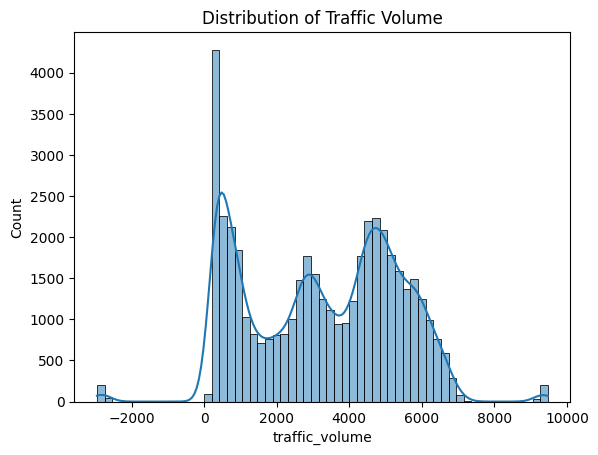

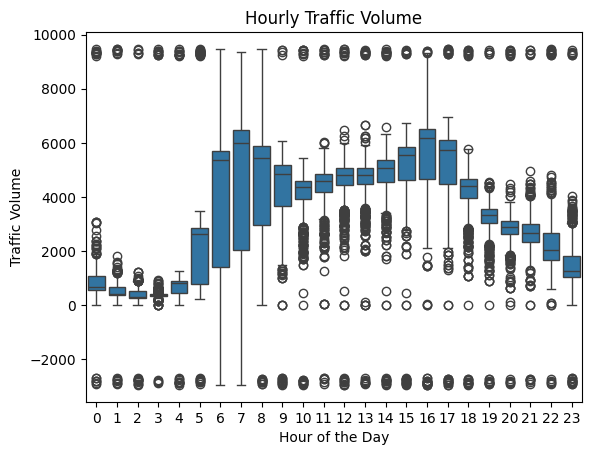

In [14]:
# Statistical summary
print(data.describe())

# Distribution of traffic volumes
sns.histplot(data['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

# Boxplot for hourly traffic volume
sns.boxplot(x=data['date_time'].dt.hour, y='traffic_volume', data=data)
plt.title('Hourly Traffic Volume')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.show()


## Identifying Noise and Anomalies

**Pairplot:** This plot helps in quickly spotting distributions, anomalies, and relationships between multiple numerical variables. Skewed distributions or unusual scatter patterns can suggest outliers or anomalies.

**Correlation Heatmap:** Useful for identifying relationships between variables. Highly correlated variables or unexpected correlations can suggest underlying patterns or errors in data collection.

**Count Plots for Categorical Data:** These plots are excellent for visualizing the frequency distribution of categorical variables. Anomalies might be very rare categories that could actually be data entry errors.

**Boxplots for Each Numerical Feature:** Boxplots are particularly useful for spotting outliers. They provide a clear visualization of the quartile ranges and any points that fall outside these ranges.

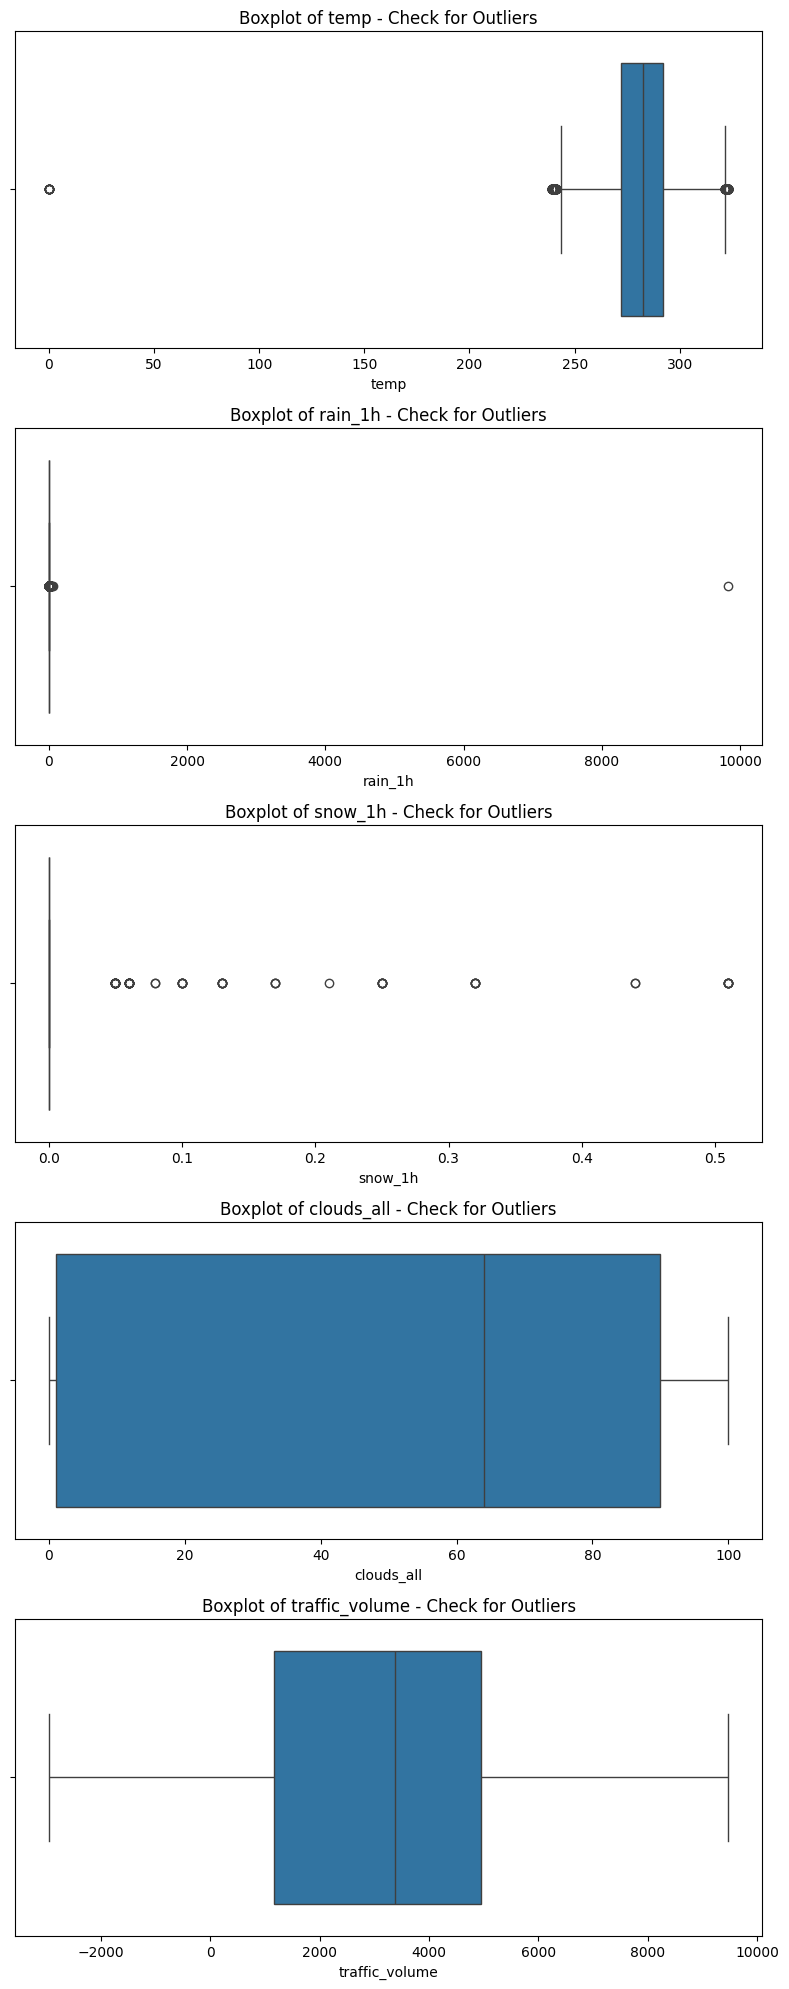

In [16]:
# Boxplots for numerical features to identify outliers
fig, axs = plt.subplots(nrows=len(data.select_dtypes(include=['number']).columns), figsize=(8, 20))
for i, col in enumerate(data.select_dtypes(include=['number']).columns):
    sns.boxplot(x=data[col], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col} - Check for Outliers')
plt.tight_layout()
plt.show()


**Removing Negative Values:** This step filters out entries with negative traffic volumes, which do not make sense in this context and should be considered noise or errors.

**Handling Outliers:** Traffic volumes that are too high are treated as outliers based on the interquartile range (IQR) method. This helps in normalizing the data distribution and preparing it for more accurate model predictions.

In [17]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# Removing rows with negative traffic volume
data = data[data['traffic_volume'] >= 0]

# Removing extreme outliers in traffic volume
Q1 = data['traffic_volume'].quantile(0.25)
Q3 = data['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['traffic_volume'] >= lower_bound) & (data['traffic_volume'] <= upper_bound)]

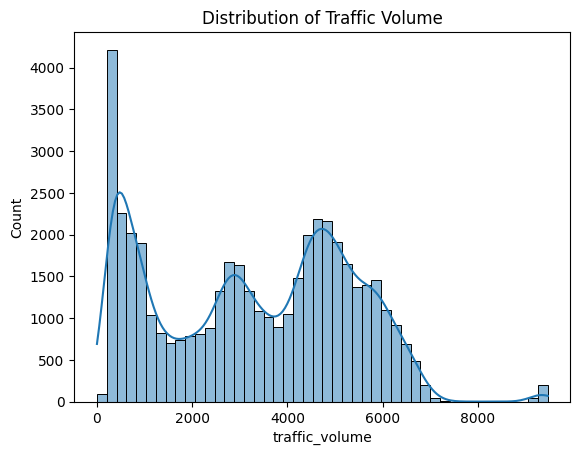

In [19]:
# New Distribution of traffic volumes
sns.histplot(data['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

In [20]:
data.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545.00000
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516.00000
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,9359.07625
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026.00000
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918.00000
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181.00000
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584.00000
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015.00000
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791.00000
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770.00000


Here is a question: How should we start transforming our dataset into a format that is efficiently read by a ML model? How can we scale this transformation so that we don not need to do it everytime?

Using a **transformation pipeline** is the answer, especially when you plan to scale your project to handle new incoming data for prediction. A transformation pipeline automates the steps of data preprocessing, such as scaling, encoding, and handling date-time variables. This not only ensures consistency in how data is treated both during model training and prediction but also simplifies the process of applying the same transformations to new data.

## Setting Up a Transformation Pipeline



In [44]:
from sklearn.base import TransformerMixin, BaseEstimator
from scipy.sparse import issparse
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Custom transformer for dense conversion
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if issparse(X):
            return X.toarray()
        return X

# Custom transformer for date-time feature extraction
class DateFeaturesExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['hour'] = X['date_time'].dt.hour
        X['day'] = X['date_time'].dt.day
        X['month'] = X['date_time'].dt.month
        X['year'] = X['date_time'].dt.year
        return X[['hour', 'day', 'month', 'year']]


# Separate features and target
features = data.drop('traffic_volume', axis=1)
target = data['traffic_volume']

# Define columns for transformations
numerical_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
categorical_cols = ['holiday', 'weather_main', 'weather_description']

# Column transformer with all preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols),
        ('date', DateFeaturesExtractor(), ['date_time'])
    ], remainder='drop')

# Create the preprocessing pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', DenseTransformer())
])

# Applying the pipeline to the feature data
transformed_features = pipeline.fit_transform(features)

# Fetch feature names from the OneHotEncoder and concatenate with other feature names
feature_names = np.concatenate([
    numerical_cols,
    pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols),
    ['hour', 'day', 'month', 'year']
])

# Create DataFrame from the processed features
transformed_df = pd.DataFrame(transformed_features, columns=feature_names)
transformed_df['traffic_volume'] = target  # Adding the target variable back

# Display the transformed data
transformed_df.head()

,temp,rain_1h,snow_1h,clouds_all,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,...,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,hour,day,month,year,traffic_volume
0,0.892333,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2.0,10.0,2012.0,5545.00000
1,0.895676,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,2.0,10.0,2012.0,4516.00000
2,0.896357,0.0,0.0,0.90,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,10.0,2012.0,9359.07625
3,0.898059,0.0,0.0,0.90,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,2012.0,5026.00000
4,0.901186,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,2.0,10.0,2012.0,4918.00000


For the **date_time variable**, you typically extract features that could have predictive power, such as the hour of the day, day of the week, month, or even year if the dataset spans several years. These extracted features can then be treated as categorical or numerical data, as shown in the DateFeaturesExtractor transformer above.

By using this pipeline, when new data comes in, you simply pass it through the pipeline which will handle all the preprocessing and prediction steps in one go. This approach not only maintains data integrity but also simplifies deployment and maintenance of your machine learning model.

In [45]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45569 entries, 0 to 45568
Columns: 114 entries, temp to traffic_volume
dtypes: float64(114)
memory usage: 39.6 MB
